In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.shape

(48204, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
df.drop(columns='holiday', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 48204 non-null  float64
 1   rain_1h              48204 non-null  float64
 2   snow_1h              48204 non-null  float64
 3   clouds_all           48204 non-null  int64  
 4   weather_main         48204 non-null  object 
 5   weather_description  48204 non-null  object 
 6   date_time            48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [10]:
df.isnull().sum() / len(df) * 100

,0
temp,0.0
rain_1h,0.0
snow_1h,0.0
clouds_all,0.0
weather_main,0.0
weather_description,0.0
date_time,0.0
traffic_volume,0.0


In [13]:
df.duplicated().sum()

np.int64(17)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [18]:
df['rain_1h'].tail()

,rain_1h
48199,0.0
48200,0.0
48201,0.0
48202,0.0
48203,0.0


In [21]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%y%d%m')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temp                 48187 non-null  float64       
 1   rain_1h              48187 non-null  float64       
 2   snow_1h              48187 non-null  float64       
 3   clouds_all           48187 non-null  int64         
 4   weather_main         48187 non-null  object        
 5   weather_description  48187 non-null  object        
 6   date_time            48187 non-null  datetime64[ns]
 7   traffic_volume       48187 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 4.3+ MB


In [24]:
df['hour'] = df['date_time'].dt.hour

In [34]:
df['hour'] = df['date_time'].dt.hour
df['month'] = df['date_time'].dt.month

In [25]:
grouped = df.groupby(['weather_main', 'hour'])['traffic_volume'].mean().reset_index()

In [26]:
pivot_table = grouped.pivot(index='weather_main', columns='hour', values='traffic_volume')

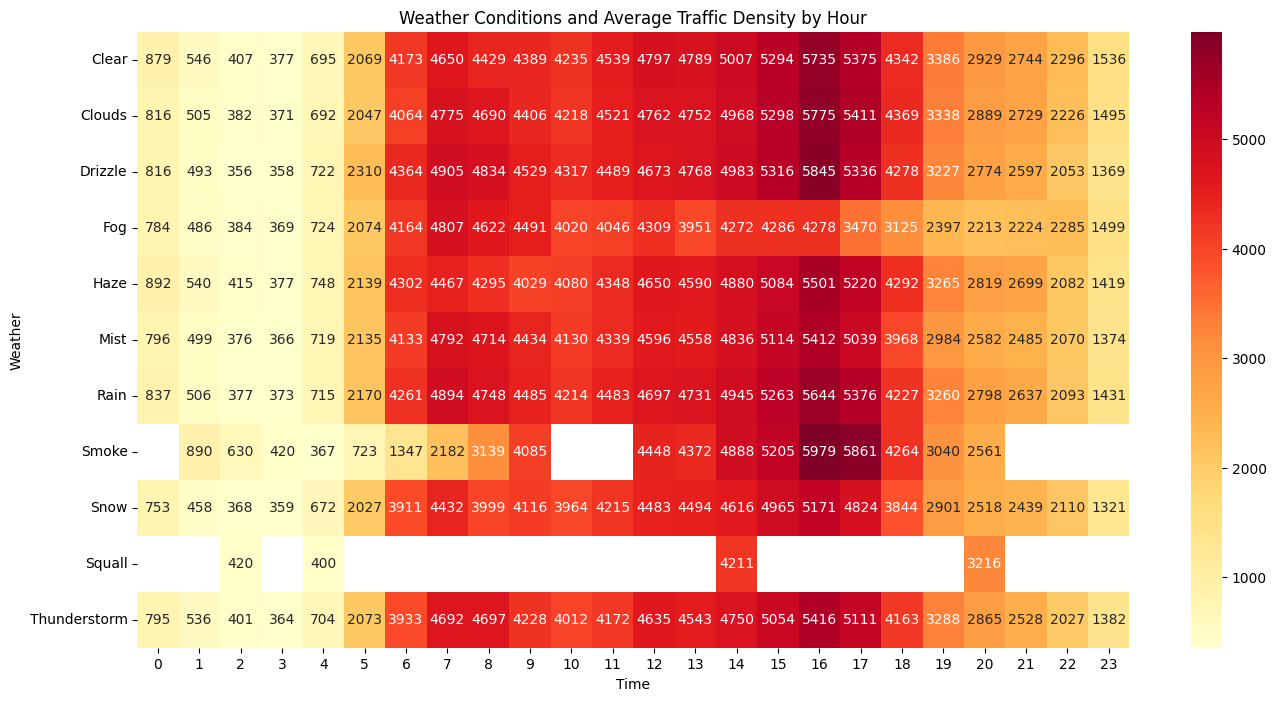

In [28]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Weather Conditions and Average Traffic Density by Hour')
plt.xlabel('Time')
plt.ylabel('Weather')
plt.show()

In [29]:
max_traffic = grouped.loc[grouped.groupby('weather_main')['traffic_volume'].idxmax()]
print(max_traffic[['weather_main', 'hour', 'traffic_volume']])

     weather_main  hour  traffic_volume
16          Clear    16     5734.848485
40         Clouds    16     5774.736211
64        Drizzle    16     5845.358209
79            Fog     7     4807.109890
112          Haze    16     5500.615385
136          Mist    16     5412.151079
160          Rain    16     5643.733333
181         Smoke    16     5979.000000
202          Snow    16     5170.922330
212        Squall    14     4211.000000
230  Thunderstorm    16     5415.666667


In [32]:
rain_18 = df[(df['hour'] == 18) & (df['weather_main'] == 'Rain')]['traffic_volume']
clear_18 = df[(df['hour'] == 18) & (df['weather_main'] == 'Clear')]['traffic_volume']

# t-test
t_stat, p_value = stats.ttest_ind(rain_18, clear_18, nan_policy='omit')

print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

T-Statistic: -2.61, P-Value: 0.0093


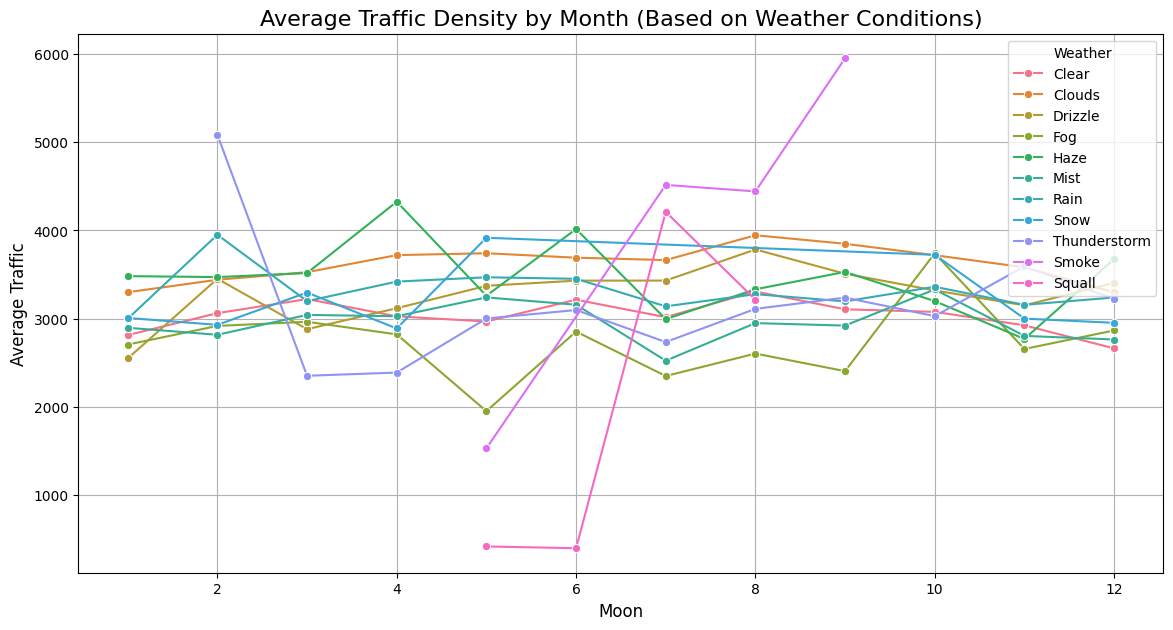

In [36]:
monthly_grouped = df.groupby(['month', 'weather_main'])['traffic_volume'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_grouped, x='month', y='traffic_volume', hue='weather_main', marker="o")
plt.title('Average Traffic Density by Month (Based on Weather Conditions)', fontsize=16)
plt.xlabel('Moon', fontsize=12)
plt.ylabel('Average Traffic', fontsize=12)
plt.legend(title='Weather')
plt.grid(True)
plt.show()